### Data Cleaning Notebook: For a dataset with zipcode as rows, we did dummied the ratings and Price.
### For the categories I used countvectorizer to assign the matrix to the original data set.
### As the Countvecrizer does not perform well, I saved the data with two copies, one with countvecrizer one without

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.cluster import KMeans

import pickle

In [2]:
df= pd.read_csv('../data/data_income.csv')
df.head()

,alias,category,city,id,latitude,longitude,price,rating,review_count,zip_code,med_agi,avg_agi,count
0,lucilles-smokehouse-bar-b-que-brea,"['bbq', 'smokehouse', 'southern']",Brea,zzvkb4J_sQAk8N20OWdZhg,33.911154,-117.881259,2,3.5,1257.0,92821.0,86070,106163,170
1,subway-restaurants-brea-4,['sandwiches'],Brea,zWs68lBY2PyNOTRJhxXapg,33.911959,-117.867374,1,3.0,22.0,92821.0,86070,106163,170
2,nekter-juice-bar-brea,"['juicebars', 'acaibowls', 'icecream']",Brea,zOYNwoDjpg6Ehwn0RKX9qA,33.911283,-117.867449,2,3.5,367.0,92821.0,86070,106163,170
3,arbys-brea-2,"['sandwiches', 'hotdogs']",Brea,zNNLl821AlzApHYqRxNALw,33.911431,-117.865941,1,2.5,84.0,92821.0,86070,106163,170
4,portofino-trattoria-brea,['italian'],Brea,zJ4pvxtpo3Y5LvylLXmCzA,33.932860,-117.916253,2,4.0,231.0,92821.0,86070,106163,170


In [3]:
df.shape

(27119, 13)

In [4]:
df.drop(columns = ['id','med_agi'], inplace = True)

## change the data set from restaurant based to zipcode based

In [5]:
df_pivot = df.pivot_table(index = ['zip_code'])
df_pivot.head()

,avg_agi,count,latitude,longitude,price,rating,review_count
zip_code,,,,,,,
90001.0,45650,90,33.976409,-118.248493,1.277778,3.638889,49.888889
90002.0,44463,21,33.954422,-118.245431,1.095238,3.380952,27.904762
90003.0,43342,59,33.971176,-118.271243,1.186441,3.203390,34.966102
90004.0,82091,137,34.075058,-118.304657,1.489051,3.799270,185.861314
90005.0,49310,112,34.059468,-118.300007,1.589286,3.571429,243.035714


##  Create New column for the combo of Price*review_count

In [6]:
df_pivot['price*rating'] = df_pivot['price'] * df_pivot['rating']

In [7]:
df_pivot['price*review_count']=df_pivot['price']*df_pivot['review_count']

In [8]:
df_pivot.head()

,avg_agi,count,latitude,longitude,price,rating,review_count,price*rating,price*review_count
zip_code,,,,,,,,,
90001.0,45650,90,33.976409,-118.248493,1.277778,3.638889,49.888889,4.649691,63.746914
90002.0,44463,21,33.954422,-118.245431,1.095238,3.380952,27.904762,3.702948,30.562358
90003.0,43342,59,33.971176,-118.271243,1.186441,3.203390,34.966102,3.800632,41.485205
90004.0,82091,137,34.075058,-118.304657,1.489051,3.799270,185.861314,5.657307,276.756993
90005.0,49310,112,34.059468,-118.300007,1.589286,3.571429,243.035714,5.676020,386.253189


## Breakdown the price from original Pivot table(average) to count how many we have for each price category

In [9]:
count_price = (pd.crosstab(df["zip_code"], df['price']))
count_price.columns = ['price_1','price_2','price_3','price_4']
count_price.head()

,price_1,price_2,price_3,price_4
zip_code,,,,
90001.0,65,25,0,0
90002.0,19,2,0,0
90003.0,50,8,0,1
90004.0,74,59,4,0
90005.0,48,62,2,0


# Break Down for Rating column

In [10]:
count_rating = (pd.crosstab(df["zip_code"], df['rating']))
count_rating.columns = ['rating_0.0','rating_1.0','rating_1.5','rating_2.0','rating_2.5','rating_3.0','rating_3.5','rating_4.0','rating_4.5','rating_5']
count_rating.head()

,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
zip_code,,,,,,,,,,
90001.0,0,0,4,8,8,8,14,19,17,12
90002.0,0,0,3,4,1,0,1,6,3,3
90003.0,0,2,7,9,6,5,6,9,7,8
90004.0,0,0,1,2,12,15,24,48,22,13
90005.0,0,1,2,5,6,19,19,45,15,0


## combine price and rating to zipcode file

In [11]:
df_count = pd.merge(count_price, count_rating, left_on = 'zip_code', right_on = 'zip_code')
df_count.head()

,price_1,price_2,price_3,price_4,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
zip_code,,,,,,,,,,,,,,
90001.0,65,25,0,0,0,0,4,8,8,8,14,19,17,12
90002.0,19,2,0,0,0,0,3,4,1,0,1,6,3,3
90003.0,50,8,0,1,0,2,7,9,6,5,6,9,7,8
90004.0,74,59,4,0,0,0,1,2,12,15,24,48,22,13
90005.0,48,62,2,0,0,1,2,5,6,19,19,45,15,0


In [12]:
df_count.shape

(322, 14)

In [13]:
df_pivot.shape

(322, 9)

## Below is the combined data for zipcode, price, and rating, without countvecrizer the catogory

In [14]:
df_dummy = pd.merge(df_pivot, df_count, on="zip_code")
df_dummy.drop(columns = ['price','rating'] ,inplace = True)
df_dummy.reset_index(inplace = True)
df_dummy.head()

,zip_code,avg_agi,count,latitude,longitude,review_count,price*rating,price*review_count,price_1,price_2,...,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
0,90001.0,45650,90,33.976409,-118.248493,49.888889,4.649691,63.746914,65,25,...,0,0,4,8,8,8,14,19,17,12
1,90002.0,44463,21,33.954422,-118.245431,27.904762,3.702948,30.562358,19,2,...,0,0,3,4,1,0,1,6,3,3
2,90003.0,43342,59,33.971176,-118.271243,34.966102,3.800632,41.485205,50,8,...,0,2,7,9,6,5,6,9,7,8
3,90004.0,82091,137,34.075058,-118.304657,185.861314,5.657307,276.756993,74,59,...,0,0,1,2,12,15,24,48,22,13
4,90005.0,49310,112,34.059468,-118.300007,243.035714,5.676020,386.253189,48,62,...,0,1,2,5,6,19,19,45,15,0


In [15]:
df_dummy['zip_code'] = df_dummy['zip_code'].astype(str)

In [16]:
df_dummy.dtypes

zip_code               object
avg_agi                 int64
count                   int64
latitude              float64
longitude             float64
review_count          float64
price*rating          float64
price*review_count    float64
price_1                 int64
price_2                 int64
price_3                 int64
price_4                 int64
rating_0.0              int64
rating_1.0              int64
rating_1.5              int64
rating_2.0              int64
rating_2.5              int64
rating_3.0              int64
rating_3.5              int64
rating_4.0              int64
rating_4.5              int64
rating_5                int64
dtype: object

# Making the category a matrix via countvectrizor 

In [17]:
cate_dict = df['category'].to_dict()

In [18]:
for i in cate_dict:
    cate_dict[i] = cate_dict[i].replace('[', '')
    cate_dict[i] = cate_dict[i].replace(']', '')
    cate_dict[i] = cate_dict[i].replace('\'', '')
    cate_dict[i] = cate_dict[i].split(', ')

In [19]:
df_cate= pd.DataFrame.from_dict(cate_dict, orient = 'index')
df_cate.head()

,0,1,2,3,4
0,bbq,smokehouse,southern,None,None
1,sandwiches,None,None,None,None
2,juicebars,acaibowls,icecream,None,None
3,sandwiches,hotdogs,None,None,None
4,italian,None,None,None,None


In [20]:
df_cate['zip_code'] = df['zip_code']
df_cate

,0,1,2,3,4,zip_code
0,bbq,smokehouse,southern,None,None,92821.0
1,sandwiches,None,None,None,None,92821.0
2,juicebars,acaibowls,icecream,None,None,92821.0
3,sandwiches,hotdogs,None,None,None,92821.0
4,italian,None,None,None,None,92821.0
...,...,...,...,...,...,...
27114,foodtrucks,sandwiches,salad,None,None,92841.0
27115,foodtrucks,tacos,None,None,None,92841.0
27116,cheesesteaks,sandwiches,chicken_wings,None,None,92845.0
27117,mexican,None,None,None,None,91764.0


In [21]:
categories_df = df_cate.astype(str).groupby('zip_code').agg(lambda x: ' '.join(x.unique())) ##borrowwed from Erin Hwang 

In [22]:
categories_df['cate_text_by_zip'] = categories_df[0] + ' ' + categories_df[1] + ' ' + categories_df[2] + ' ' + categories_df[3] + ' ' + categories_df[4]
categories_df.head()##borrowwed from Erin Hwang

,0,1,2,3,4,cate_text_by_zip
zip_code,,,,,,
90001.0,mexican foodtrucks burgers newamerican seafood...,None comfortfood sandwiches breakfast_brunch s...,None sandwiches catering bbq herbsandspices ch...,None,None,mexican foodtrucks burgers newamerican seafood...
90002.0,mexican pizza chicken_wings chinese sandwiches...,foodstands hotdogs None breakfast_brunch juice...,None desserts coffee foodstands chicken_wings ...,None,None,mexican pizza chicken_wings chinese sandwiches...
90003.0,breakfast_brunch grocery streetvendors mexican...,burgers bakeries mexican None coffee sandwiche...,mexican meats None sandwiches coffee greek ice...,None,None,breakfast_brunch grocery streetvendors mexican...
90004.0,coffee bbq filipino pizza korean gastropubs ba...,breakfast_brunch foodstands None kosher bbq ko...,cafes None salad german latin breakfast_brunch...,None,None,coffee bbq filipino pizza korean gastropubs ba...
90005.0,salvadoran bakeries bubbletea korean coffee br...,None shavedice bbq bubbletea newamerican sushi...,None icecream desserts korean italian noodles ...,None,None,salvadoran bakeries bubbletea korean coffee br...


In [23]:
cvec = CountVectorizer()

In [24]:
categories_df.reset_index(inplace = True)

In [25]:
X = categories_df['cate_text_by_zip']
y = categories_df['zip_code']

In [26]:
df_cate = pd.DataFrame(cvec.fit_transform(X).toarray(),
                columns=cvec.get_feature_names() ) #
df_cate.head()

,acaibowls,accessories,acupuncture,afghani,african,airportlounges,amusementparks,antiques,appliances,arabian,...,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## save the data with countvecrizer. As we tried model with countevecrizer on how frequent each category shows in each zip code and it did not perform well, our model uses the one without vecrerizer.

In [27]:
df = pd.concat([df_dummy, df_cate], axis=1, sort=False)
df.head()

,zip_code,avg_agi,count,latitude,longitude,review_count,price*rating,price*review_count,price_1,price_2,...,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
0,90001.0,45650,90,33.976409,-118.248493,49.888889,4.649691,63.746914,65,25,...,0,0,0,0,0,0,0,0,0,0
1,90002.0,44463,21,33.954422,-118.245431,27.904762,3.702948,30.562358,19,2,...,0,0,0,0,0,0,0,0,0,0
2,90003.0,43342,59,33.971176,-118.271243,34.966102,3.800632,41.485205,50,8,...,0,0,0,0,0,0,0,0,0,0
3,90004.0,82091,137,34.075058,-118.304657,185.861314,5.657307,276.756993,74,59,...,0,0,0,0,0,0,0,0,0,0
4,90005.0,49310,112,34.059468,-118.300007,243.035714,5.676020,386.253189,48,62,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# df.to_csv('../data/data_cv.csv')

## Begin to Model

In [29]:
X = df_dummy.drop(columns=['avg_agi','latitude','longitude','zip_code'])
#features = list(X.columns)
y = df_dummy['avg_agi']

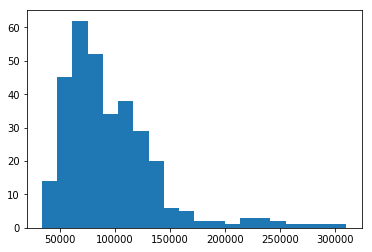

In [30]:
plt.hist(df["avg_agi"], bins=20);

In [31]:
y = np.log(df_dummy["avg_agi"])  #y = np.log(df.copy()["ave_agi"])

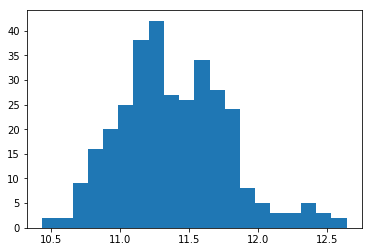

In [32]:
plt.hist(y, bins=20);

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.3
)

# Trying different models
 - linear regression
 - knn regression
 - decision tree
 - bagging
 - random_forest
 - ada boost
 - support_vector

In [34]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

cart_reg = DecisionTreeRegressor()
cart_reg.fit(X_train, y_train)

bagged_reg = BaggingRegressor()
bagged_reg.fit(X_train, y_train)

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(X_train, y_train)

support_vector_reg = SVR()
support_vector_reg.fit(X_train, y_train)

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

# Evaluate our models

In [35]:
def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("The training RMSE for " + str(model) + " is: " + str(rmse_train))
    print("The testing RMSE for " + str(model) + " is: " + str(rmse_test))
    return (rmse_train, rmse_test)

## Evaluate linear regression

In [36]:
rmse_score(linear_reg, X_train, X_test, y_train, y_test)

The training RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.2854316273525897
The testing RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.28577703112150205


(0.2854316273525897, 0.28577703112150205)

In [37]:
print(linear_reg.score(X_train, y_train))
print (linear_reg.score(X_test, y_test))

0.47194824695254023
0.4726895259700069


In [38]:
linear_reg.coef_

array([-7.34502699e-03,  1.38914213e-03,  1.11960437e-01, -4.45329085e-04,
       -4.48760003e-03,  4.57086734e-04,  5.74438653e-03, -9.05890023e-03,
        1.82145965e-17, -4.18563128e-02, -2.75353244e-02,  7.98051238e-03,
        2.18485158e-02,  1.55781110e-02,  9.61974158e-03,  4.90461590e-03,
        4.61396173e-03, -2.49884820e-03])

## Evaluate Knn

In [39]:
rmse_score(knn_reg, X_train, X_test, y_train, y_test)

The training RMSE for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.23798696124452132
The testing RMSE for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.34107773170330197


(0.23798696124452132, 0.34107773170330197)

In [40]:
print(knn_reg.score(X_train, y_train))
print (knn_reg.score(X_test, y_test))

0.6329048649860625
0.24886415095370606


## Evaluate decision tree

In [41]:
rmse_score(cart_reg, X_train, X_test, y_train, y_test)

The training RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is: 1.782300934611769e-05
The testing RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is: 0.37472345844038146


(1.782300934611769e-05, 0.37472345844038146)

In [42]:
print(cart_reg.score(X_train, y_train))
print (cart_reg.score(X_test, y_test))

0.9999999979411042
0.09336282839043852


## Evaluate Bagging model

In [43]:
rmse_score(bagged_reg, X_train, X_test, y_train, y_test)

The training RMSE for BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False) is: 0.11194727072087893
The testing RMSE for BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False) is: 0.29407347966594466


(0.11194727072087893, 0.29407347966594466)

In [44]:
print(bagged_reg.score(X_train, y_train))
print (bagged_reg.score(X_test, y_test))

0.9187732042569602
0.4416281975412011


## Evaluate random forest

In [45]:
rmse_score(random_forest_reg, X_train, X_test, y_train, y_test)

The training RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) is: 0.12067292414861946
The testing RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) is: 0.2

(0.12067292414861946, 0.28716322020395074)

In [46]:
print(random_forest_reg.score(X_train, y_train))
print (random_forest_reg.score(X_test, y_test))

0.9056173917288735
0.4675615785211461


## Evaluate adaboost

In [47]:
rmse_score(adaboost_reg, X_train, X_test, y_train, y_test)

The training RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) is: 0.2003685340308441
The testing RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) is: 0.28660932905036735


(0.2003685340308441, 0.28660932905036735)

In [48]:
print(adaboost_reg.score(X_train, y_train))
print (adaboost_reg.score(X_test, y_test))

0.7397855899790439
0.4696135718908583


## Evaluate Support vector regression

In [49]:
rmse_score(support_vector_reg, X_train, X_test, y_train, y_test)

The training RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is: 0.09612372900631759
The testing RMSE for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is: 0.4023430487886547


(0.09612372900631759, 0.4023430487886547)

In [50]:
print(support_vector_reg.score(X_train, y_train))
print (support_vector_reg.score(X_test, y_test))

0.9401128670115707
-0.0452129035232578


## Test Model with pipelines

In [51]:
pipe = Pipeline([
    ('linear', LinearRegression())
])

pipe_params = {
                 'linear__fit_intercept': [True,False], 
                 'linear__normalize': [True, False],
                 'linear__copy_X': [True, False],
                 'linear__n_jobs': [1,5,10]
}

pipe_gridsearch = GridSearchCV(pipe, 
                                 pipe_params, 
                                 cv=5, 
                                 verbose=1)
pipe_gridsearch.fit(X_train, y_train);
print(pipe_gridsearch.best_score_)
pipe_gridsearch.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.2987747241699259


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


Pipeline(memory=None,
         steps=[('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1,
                                  normalize=False))],
         verbose=False)

In [52]:
knn_params = {
    'n_neighbors': range(1, 51, 10),
    'metric': ['euclidean', 'manhattan']
}
knn_gridsearch = GridSearchCV(KNeighborsRegressor(), 
                              knn_params, 
                              cv=5, 
                              verbose=1)
knn_gridsearch.fit(X_train, y_train);
best_knn = knn_gridsearch.best_estimator_
best_knn.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


0.37705695677653783

In [53]:
cart_params = {
    'max_depth': [15,25,50]
    
}
cart_gridsearch = GridSearchCV(DecisionTreeRegressor(), 
                              cart_params, 
                              cv=5, 
                              verbose=1)
cart_gridsearch.fit(X_train, y_train);
best_cart = cart_gridsearch.best_estimator_
best_cart.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


0.010068636155538324

In [54]:
BaggingRegressor()

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [55]:
bag_params = {
    'n_estimators': [120,140,160],
    
    
}
bag_gridsearch = GridSearchCV(BaggingRegressor(),
                              bag_params,
                              cv=5, 
                              verbose=1)
bag_gridsearch.fit(X_train, y_train);
best_bag = bag_gridsearch.best_estimator_
print (best_bag)
best_bag.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.3s finished


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=160,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)


0.49812913428201555

In [56]:
rf_params = {
    'n_estimators': [100,110,120],
    'max_depth':[6,7,8,9]
    
    
}
rf_gridsearch = GridSearchCV(RandomForestRegressor(), 
                              rf_params,
                              cv=5, 
                              verbose=1)
rf_gridsearch.fit(X_train, y_train);
best_rf = rf_gridsearch.best_estimator_
print (best_rf)
best_rf.score(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    9.2s finished


0.5020095665131115

In [57]:
AdaBoostRegressor()

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [58]:
ada_params = {
    'n_estimators': [75,85,90]
}
ada_gridsearch = GridSearchCV(AdaBoostRegressor(), 
                              ada_params, 
                              cv=5, 
                              verbose=1)
ada_gridsearch.fit(X_train, y_train);
best_ada = ada_gridsearch.best_estimator_
print (best_ada)
best_ada.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=85, random_state=None)


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.9s finished


0.44649325282507746

In [59]:
svr_params = {
    'degree': [2,3]
}
svr_gridsearch = GridSearchCV(SVR(), 
                              svr_params, 
                              cv=5, 
                              verbose=1)
svr_gridsearch.fit(X_train, y_train);
best_svr = svr_gridsearch.best_estimator_
print (best_svr)
best_svr.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this war

Fitting 5 folds for each of 2 candidates, totalling 10 fits
SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/

-0.0452129035232578

|model|RMSE Train|RMSE Test|R2 Train|R2 Test|pipeline R2 test|
| --- | --- | --- | --- | ---|---|
|Linear Regression| 0.42|0.46|0.50|0.44|0.42|
|KNN Regression| 0.39|0.51|0.60|0.37|0.39|
|Decision Tree Regression| 8.11e05|0.56|0.99|0.16|0.001|
|Baggin Regression| 0.19|0.46|0.89|0.45|0.54|
|Random Forest Regression| 0.17|0.42|0.90|0.39|0.52|
|Adaboost Regression| 0.29|0.42|0.77|0.53|0.519|
|support vector Regression| 0.17|0.62|0.92|-0.01|-0.01|

# Using KMean Cluster to group Zipcodes

In [60]:
X.head()

,count,review_count,price*rating,price*review_count,price_1,price_2,price_3,price_4,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
0,90,49.888889,4.649691,63.746914,65,25,0,0,0,0,4,8,8,8,14,19,17,12
1,21,27.904762,3.702948,30.562358,19,2,0,0,0,0,3,4,1,0,1,6,3,3
2,59,34.966102,3.800632,41.485205,50,8,0,1,0,2,7,9,6,5,6,9,7,8
3,137,185.861314,5.657307,276.756993,74,59,4,0,0,0,1,2,12,15,24,48,22,13
4,112,243.035714,5.676020,386.253189,48,62,2,0,0,1,2,5,6,19,19,45,15,0


In [61]:
def transfer_tune(X, y, k):
    location_data = df_dummy[["latitude", "longitude"]]
    km = KMeans(n_clusters=k,random_state = 42 )
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.3
    )
    best_rf.fit(X_train, y_train)
    r2 =best_rf.score(X_test, y_test)
    print(f"{k} : {r2}")

In [62]:
for k in range(20, 50, 1):
    transfer_tune(X, y, k)

20 : 0.488085622431947
21 : 0.5281322115038495
22 : 0.5225881136277866
23 : 0.5028869324222045
24 : 0.5131750248399849
25 : 0.49955878148570787
26 : 0.530135233656203
27 : 0.5014765590907149
28 : 0.5196690711530692
29 : 0.5126740352256453
30 : 0.5187463242659904
31 : 0.5261187259298137
32 : 0.5352658404110746
33 : 0.5006993824022119
34 : 0.5128779133831691
35 : 0.5152149851885772
36 : 0.5370082668342568
37 : 0.5204405400667217
38 : 0.5381297570882142
39 : 0.53268022893456
40 : 0.5030302589637718
41 : 0.5364910206666788
42 : 0.5238688342577844
43 : 0.5309609090789559
44 : 0.4997440528021889
45 : 0.5026069445318475
46 : 0.5163861224567594
47 : 0.5000932692107004
48 : 0.5162752927717598
49 : 0.5107767620353302


In [63]:
location_data = df_dummy[["latitude", "longitude"]]
km = KMeans(n_clusters=58, random_state = 42)
km.fit(location_data)
X.loc[:, "cluster"] = km.predict(location_data)
X_dummy = pd.get_dummies(columns=["cluster"], data=X)
X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.3
)

best_rf.fit(X_train, y_train)
r2 = best_rf.score(X_test, y_test)
print (r2)

0.5309989246155564


In [64]:
# Columns used in this order, need to copy and paste to app.py
# Because Pandas rearranges order in alphabetical order when save to csv

X_train.columns

Index(['count', 'review_count', 'price*rating', 'price*review_count',
       'price_1', 'price_2', 'price_3', 'price_4', 'rating_0.0', 'rating_1.0',
       'rating_1.5', 'rating_2.0', 'rating_2.5', 'rating_3.0', 'rating_3.5',
       'rating_4.0', 'rating_4.5', 'rating_5', 'cluster_0', 'cluster_1',
       'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6',
       'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10', 'cluster_11',
       'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15', 'cluster_16',
       'cluster_17', 'cluster_18', 'cluster_19', 'cluster_20', 'cluster_21',
       'cluster_22', 'cluster_23', 'cluster_24', 'cluster_25', 'cluster_26',
       'cluster_27', 'cluster_28', 'cluster_29', 'cluster_30', 'cluster_31',
       'cluster_32', 'cluster_33', 'cluster_34', 'cluster_35', 'cluster_36',
       'cluster_37', 'cluster_38', 'cluster_39', 'cluster_40', 'cluster_41',
       'cluster_42', 'cluster_43', 'cluster_44', 'cluster_45', 'cluster_46',
       'cluster_

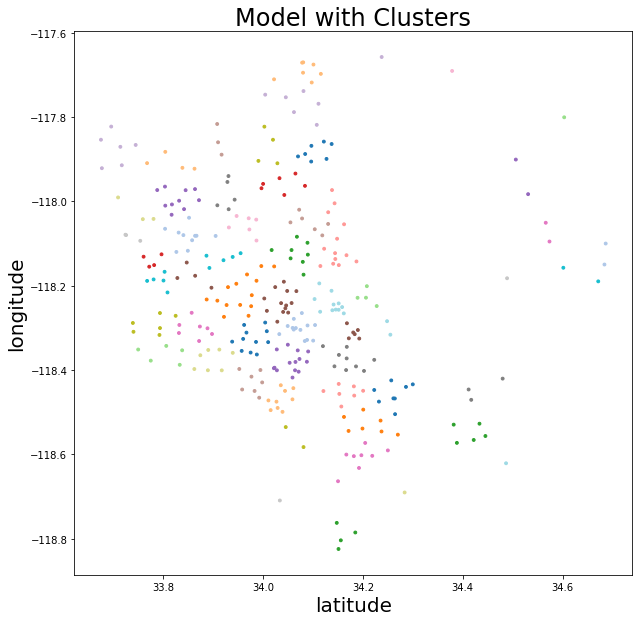

In [65]:
plt.figure(figsize=(10, 10))
plt.scatter(df_dummy.latitude, df_dummy.longitude, c=km.labels_, s=8, cmap="tab20")
plt.xlabel("latitude", fontsize = 20)
plt.ylabel("longitude", fontsize = 20)
plt.title('Model with Clusters', fontsize = 24);

In [66]:
# creating .csv file to make predictions from in Flask app

X_cluster = pd.concat([X_train,X_test],axis = 0, sort = False)
X_cluster = pd.concat([df_dummy['zip_code'],X_cluster.sort_index()],axis = 1)

X_cluster.to_csv('../data/X_cluster.csv')

In [67]:
y_pred = best_bag.predict(X_test)

In [68]:
residuals = np.exp(y_test )- np.exp(y_pred)

In [69]:
residuals.mean()

7949.596197962976

Text(0.5, 1.0, 'Residual Mean')

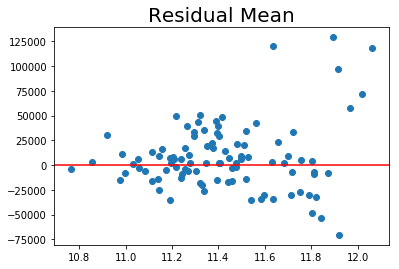

In [70]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r')
plt.title('Residual Mean',size = 20)
#plt.savefig('./plots/residual.png')

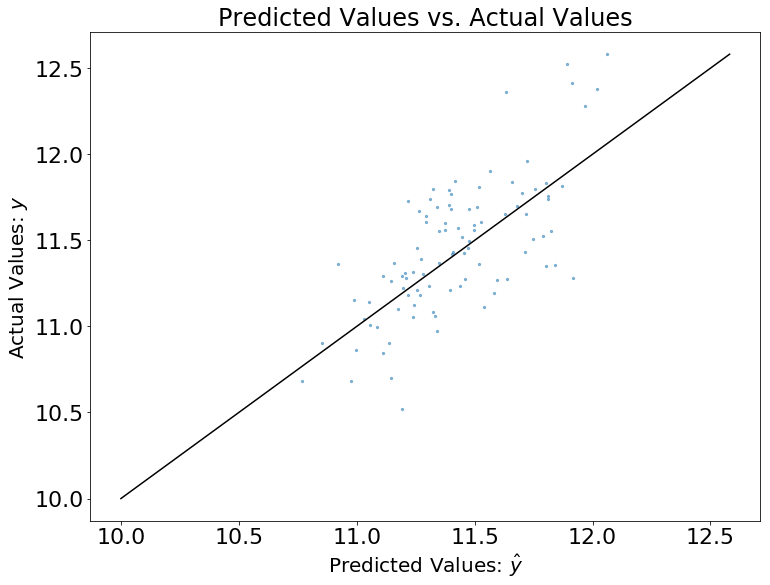

In [71]:

plt.figure(figsize=(12,9))
plt.rc('font', size=22)
# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y_test, s=5, alpha = 0.5)

# Plot a line.
plt.plot([10, np.max(y_test)],
         [10, np.max(y_test)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [72]:
# Pickle to be used in Flask app; using pickle from 05 - Advanced Modeling instead
# pickle.dump(best_bag, open('../flask_app_complete/model.p', 'wb'))